# Integrazione numerica del sistema di Lorenz

Federica Benassi

In [144]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Integrazione tramite Euler forward

In [145]:
def lorenz(params, x, y, z):
    sigma = params[0]
    b = params[1]
    r = params[2]
    x_dot = sigma * (y - x)
    y_dot = r*x - x*z - y
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [146]:
# Definizione punto di partenza
L0 = (9, 10, 20)

# Definizione set di parametri
set_A = (10, 8./3., 28)
set_B = (10, 8./3., 9)

# Definizione set temporale
t_f = 60
dt = 0.005
num_steps = int(t_f/dt)
t = np.linspace(0,t_f,num_steps + 1)

In [147]:
def forward_euler(params_set, L0, num_steps=num_steps, dt=dt):
    # Definizione condizioni iniziali
    x0, y0, z0 = L0

    # Definizione coordinate per entrambi i set
    x = np.zeros(num_steps+1)
    y = np.zeros(num_steps+1)
    z = np.zeros(num_steps+1)

    x[0] = x0
    y[0] = y0
    z[0] = z0

    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(params_set, x[i], y[i], z[i])
        
        x[i + 1] = x[i] + (x_dot * dt) 
        y[i + 1] = y[i] + (y_dot * dt)
        z[i + 1] = z[i] + (z_dot * dt)
    
    return x, y, z

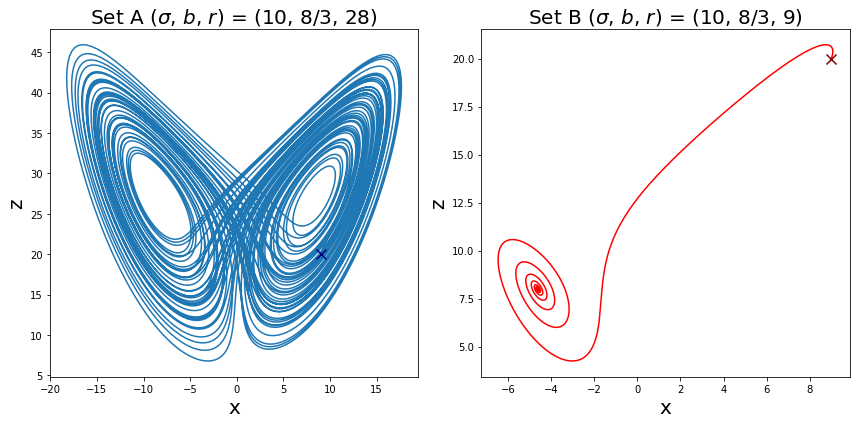

In [148]:
x_A, y_A, z_A = forward_euler(set_A, L0)
x_B, y_B, z_B = forward_euler(set_B, L0)


fig, ax = plt.subplots(figsize = [12,6], nrows = 1, ncols = 2)

#####
ax[0].tick_params(axis='both', which='major', labelsize=10)
ax[0].plot(x_A,z_A)
ax[0].set_title("Set A ($\sigma$, $b$, $r$) = (10, 8/3, 28)", fontsize = 20)
ax[0].set_xlabel("x", fontsize = 20)
ax[0].set_ylabel("z", fontsize = 20)
ax[0].scatter(x_A[0], z_A[0], color = "navy", zorder = 2, s = 100, marker = "x")

#####
ax[1].tick_params(axis='both', which='major', labelsize=10)
ax[1].plot(x_B,z_B, color = "red")
ax[1].set_title("Set B ($\sigma$, $b$, $r$) = (10, 8/3, 9)", fontsize = 20)
ax[1].set_xlabel("x", fontsize = 20)
ax[1].set_ylabel("z", fontsize = 20)
ax[1].scatter(x_A[0], z_A[0], color = "darkred", zorder = 2, s = 100, marker = "x")

#####

fig.tight_layout()
plt.savefig("1_trajectories.pdf", bbox_inches = "tight")

## 2) Uno starting point diverso

In [149]:
# Definizione condizione iniziale perturbata
epsi = 1e-10
L0 = (9 + epsi, 10, 20)

# Definizione set temporale
t_f = 60
dt = 0.005
num_steps = int(t_f/dt)
t = np.linspace(0,t_f,num_steps + 1)

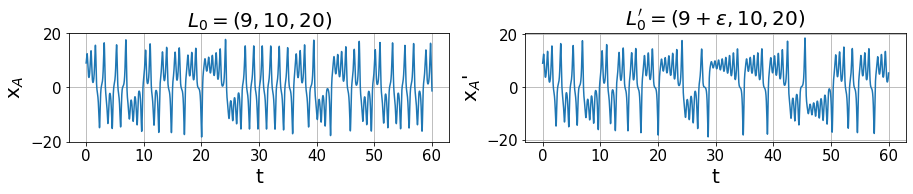

In [150]:
x_A1, _, _ = forward_euler(set_A, L0)

fig, ax = plt.subplots(figsize = [15,2], nrows = 1, ncols = 2)

#####

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].plot(t,x_A)
ax[0].set_xlabel("t", fontsize = 20)
ax[0].set_ylabel("x$_A$", fontsize = 20)
ax[0].set_title("$L_0 = (9, 10, 20)$", fontsize = 20)
ax[0].grid()
ax[0].set_ylim([-20,20])

#####

ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].plot(t,x_A1)
ax[1].set_xlabel("t", fontsize = 20)
ax[1].set_ylabel("x$_A$'", fontsize = 20)
ax[1].set_title("$L_0' = (9 + \epsilon, 10, 20)$", fontsize = 20)
ax[1].grid()

#####

plt.savefig("2_A.pdf", bbox_inches = "tight")

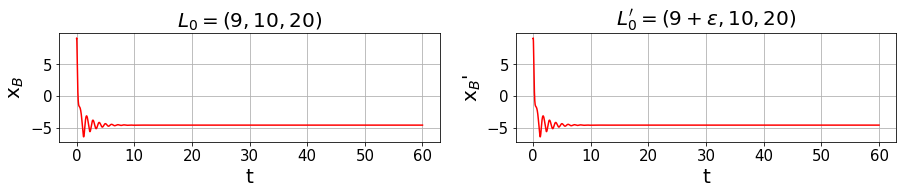

In [151]:
x_B1, _, _ = forward_euler(set_B, L0)

fig, ax = plt.subplots(figsize = [15,2], nrows = 1, ncols = 2)

#####

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].plot(t,x_B, color = "red")
ax[0].set_xlabel("t", fontsize = 20)
ax[0].set_ylabel("x$_B$", fontsize = 20)
ax[0].set_title("$L_0 = (9, 10, 20)$", fontsize = 20)
ax[0].grid()

#####

ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].plot(t,x_B1, color = "red")
ax[1].set_xlabel("t", fontsize = 20)
ax[1].set_ylabel("x$_B$'", fontsize = 20)
ax[1].set_title("$L_0' = (9 + \epsilon, 10, 20)$", fontsize = 20)
ax[1].grid()

#####

plt.savefig("2_B.pdf", bbox_inches = "tight")

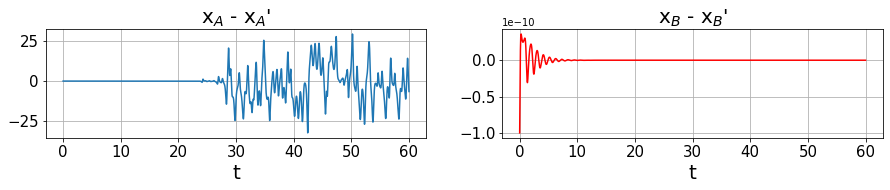

In [152]:
fig, ax = plt.subplots(figsize = [15,2], nrows = 1, ncols = 2)

#####

ax[0].set_xlabel("t", fontsize = 20)
ax[0].plot(t, x_A - x_A1)
ax[0].grid()
ax[0].set_title("x$_A$ - x$_A$'", fontsize = 20)
ax[0].tick_params(axis='both', which='major', labelsize=15)

#####

ax[1].set_title("x$_B$ - x$_B$'", fontsize = 20)
ax[1].set_xlabel("t", fontsize = 20)
ax[1].plot(t, x_B - x_B1, color = "red")
ax[1].grid()
ax[1].tick_params(axis='both', which='major', labelsize=15)

#####

plt.savefig("2_diffs.pdf", bbox_inches = "tight")

## 3) RMSE

In [153]:
# Definizione set temporale
t_f = 60
dt = 0.005
num_steps = int(t_f/dt)
t = np.linspace(0,t_f,num_steps + 1)

# Definizione condizione iniziale perturbata
epsi = 1e-10
L_true = (9, 10, 20)
L_prime = (9 + epsi, 10, 20)

In [154]:
# Traiettoria stato osservato L_0 = (9, 10, 20)
x_true, y_true, z_true = forward_euler(set_A, L_true)

# Traiettoria stato perturbatp L_0' = (9 + epsi, 10, 20)
x_prime, y_prime, z_prime = forward_euler(set_A, L_prime)

In [155]:
# Calcolo RMSE
RMSE = np.sqrt( (x_true - x_prime)**2 
               + (y_true - y_prime)**2
              + (z_true - z_prime)**2)

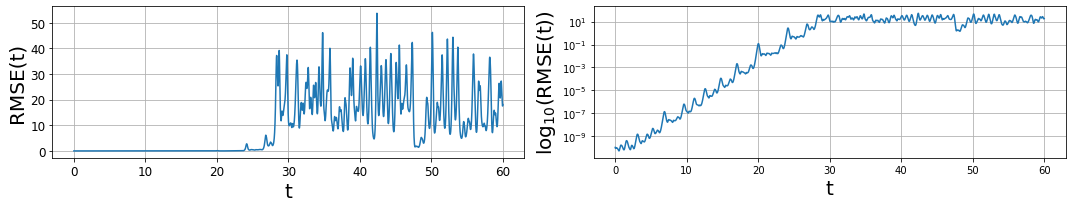

In [156]:
fig, ax = plt.subplots(figsize = [15, 3], nrows = 1, ncols = 2)

#####

ax[0].plot(t, RMSE)
ax[0].set_ylabel("RMSE(t)", fontsize = 20)
ax[0].grid()
ax[0].set_xlabel("t", fontsize = 20)
ax[0].tick_params(axis='both', which='major', labelsize=12)

#####

ax[1].set_yscale("log")
ax[1].plot(t, RMSE)
ax[1].set_ylabel("$\log_{10}$(RMSE(t))", fontsize = 20)
ax[1].set_xlabel("t", fontsize = 20)
ax[1].grid()

#####

plt.tight_layout()
plt.savefig("3_RMSE.pdf", bbox_inches = "tight")

In [157]:
# Calcolo del tempo di predicibilità in funzione della perturbazione

epsi_list = [1e-10, 1e-5, 1e-3, 1e-1]
a = 0.5
R_list = []

# Calcolo di RMSE(t) per ogni traiettoria perturbata da epsi
for epsi in epsi_list:
    L_prime = (9 + epsi, 10, 20)
    x_prime, y_prime, z_prime = forward_euler(set_A, L_prime)
    RMSE = np.sqrt( (x_true - x_prime)**2 
               + (y_true - y_prime)**2
              + (z_true - z_prime)**2)
    R_list.append(RMSE)
    
# Calcolo del tempo di predicibilità
t_list = []
for i in range(4):
    t_a = t[R_list[i] > a][0]
    t_list.append(t_a)

In [158]:
print(epsi_list)
print(t_list)

[1e-10, 1e-05, 0.001, 0.1]
[23.915, 12.395, 6.715, 2.9250000000000003]


## 4) Ensemble di condizioni iniziali

In [159]:
# Definizione set temporale

num_steps = int(4./dt)
t = np.linspace(0., 4., num_steps + 1)

# Definizione ensemble di condizioni iniziali
N = 100
L0_list = np.zeros([N,3])
L0_list[:,:] = [9, 10, 20]
# Perturbazione della coordinata x 
L0_list[:,0] += np.random.random(size = N)*1.5 - 0.75

# Inizializzazione della matrice dell'ensemble
x_list = np.zeros([N, len(t)])
y_list = np.zeros([N, len(t)])
z_list = np.zeros([N, len(t)])

# Calcolo dello stato osservato
x_true, y_true, z_true = forward_euler(set_A, [9, 10, 20], num_steps = num_steps)

# Calcolo dell'evoluzione dell'ensemble
for (i, L0) in enumerate(L0_list):
    x_list[i,:], y_list[i,:], z_list[i,:] = forward_euler(set_A, L0, num_steps = num_steps)

In [160]:
# Calcolo della matrice dei RMSE(t) per ogni traiettoria
R_list = np.sqrt( (x_true - x_list)**2 + (y_true - y_list)**2 + (z_true - z_list)**2 )

# Inizializzazione vettori RMSE della media e RMSE medio
R_avg = np.zeros(len(t))
avg_R = np.zeros(len(t))

for i in range(len(t)):
    x_mean = x_list[:,i].mean()
    y_mean = y_list[:,i].mean()
    z_mean = z_list[:,i].mean()

    R_avg[i] = np.sqrt( (x_true[i] - x_mean)**2 + (y_true[i] - y_mean)**2 + (z_true[i] - z_mean)**2 )
    avg_R[i] = np.mean(R_list[:,i])

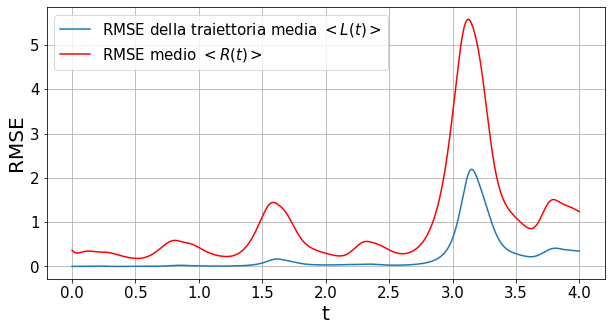

In [161]:
plt.figure(figsize = [10,5])

#####

plt.plot(t, R_avg, label = "RMSE della traiettoria media $< L(t) >$")
plt.plot(t, avg_R, color = "red", label = "RMSE medio $< R(t) >$")
plt.grid()
plt.legend(fontsize = 15)
plt.xlabel("t", fontsize = 20)
plt.ylabel("RMSE", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)

#####

plt.savefig("4_RMSEavg.pdf", bbox_inches = "tight")

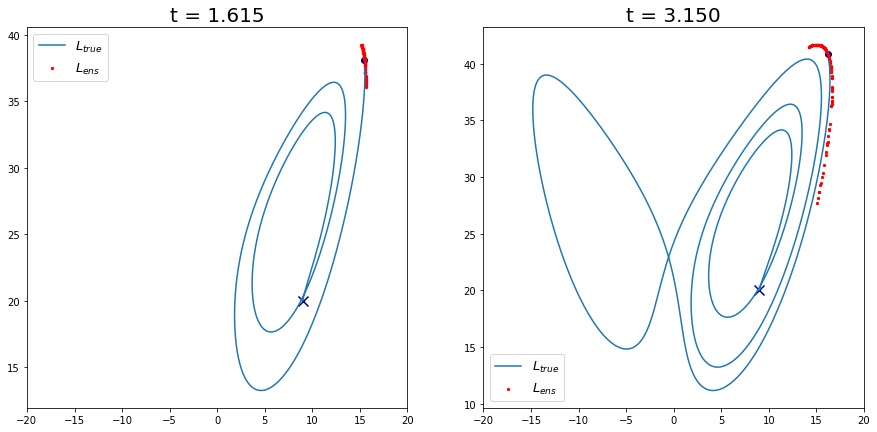

In [162]:
# Visualizzazione delle traiettorie per i due massimi locali di RMSE

fig, ax = plt.subplots(figsize = [15,7], nrows = 1, ncols = 2)

#####

# Calcolo del primo massimo locale 
arg_max = np.argmax(R_avg[:350])
t_max = t[arg_max]

# Traiettorie dell'ensemble a t_max
x_ens = x_list[:,arg_max]
z_ens = z_list[:,arg_max]

ax[0].plot(x_true[:arg_max], z_true[:arg_max], label = "$L_{true}$")
ax[0].scatter(x_true[arg_max], z_true[arg_max], color = "navy")
ax[0].scatter(x_ens, z_ens, color = "red", label = "$L_{ens}$", s = 5)
ax[0].scatter(x_true[0], z_true[0], marker = "x", s = 100, color = "navy")
ax[0].set_xlim([-20, 20])
ax[0].set_title("t = %4.3f"%t_max, fontsize = 20)
ax[0].legend(fontsize = 13)

#####

# Calcolo del secondo massimo locale (assoluto)
arg_max = np.argmax(R_avg)
t_max = t[arg_max]

# Traiettorie a t_max
x_ens = x_list[:,arg_max]
z_ens = z_list[:,arg_max]

ax[1].plot(x_true[:arg_max], z_true[:arg_max], label = "$L_{true}$")
ax[1].scatter(x_true[arg_max], z_true[arg_max], color = "navy")
ax[1].scatter(x_ens, z_ens, color = "red", label = "$L_{ens}$", s = 5)
ax[1].scatter(x_true[0], z_true[0], marker = "x", s = 100, color = "navy")
ax[1].set_xlim([-20, 20])
ax[1].set_title("t = %4.3f"%t_max, fontsize = 20)
ax[1].legend(fontsize = 13)

#####

plt.savefig("4_trajectories.pdf", bbox_inches = "tight")

## 5) Calcolo di S

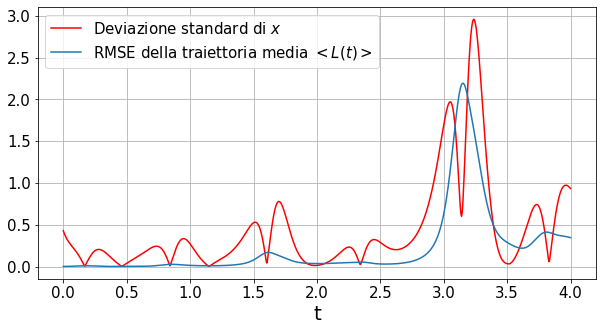

In [163]:
# Calcolo della traiettoria media di ensemble
x_mens = x_list.mean(axis = 0)

# Calcolo di s
s = np.sqrt(  np.mean((x_list - x_mens)**2, axis = 0)  )

plt.figure(figsize = [10,5])

#####

plt.plot(t, s, label = "Deviazione standard di $x$", color = "red")
plt.plot(t, R_avg, label = "RMSE della traiettoria media $< L(t) >$")
plt.grid()
plt.legend(fontsize = 15)
plt.xlabel("t", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)

#####

plt.savefig("5_s.pdf", bbox_inches = "tight")

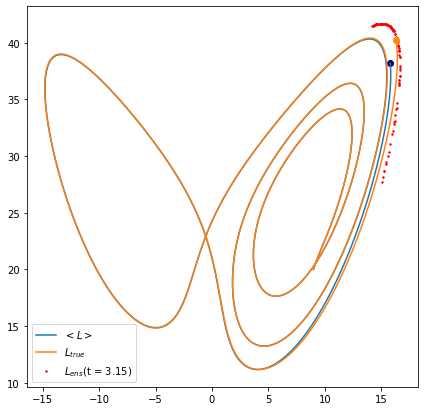

In [164]:
t_max = t[np.argmax(R_avg)]

x_ens = x_list[:,np.argmax(R_avg)]
z_ens = z_list[:,np.argmax(R_avg)]

x_mean = x_list.mean(axis=0)
z_mean = z_list.mean(axis=0)

#####

plt.figure(figsize = [7,7])
plt.plot(x_mean[:np.argmax(R_avg)], z_mean[:np.argmax(R_avg)], label = "$<L>$")
plt.plot(x_true[:np.argmax(R_avg)], z_true[:np.argmax(R_avg)], label = "$L_{true}$")
plt.scatter(x_ens, z_ens, color = "red", label = "$L_{ens}$(t = 3.15)", s = 2)
plt.scatter(x_true[:np.argmax(R_avg)][-1], z_true[:np.argmax(R_avg)][-1], color = "darkorange")
plt.scatter(x_mean[:np.argmax(R_avg)][-1], z_mean[:np.argmax(R_avg)][-1], color = "navy")
plt.legend()

#####



## 6) Sistema

In [165]:
# Il sistema e la funzione forward_euler sono ridefiniti per
# poter inserire il forcing dipendente dal tempo

def lorenz(params, x, y, z, t, flag = 0):
    sigma = params[0]
    b = params[1]
    r = params[2]
    x_dot = sigma * (y - x)
    if flag == 0:
        y_dot = r*x - x*z - y
    else:
        y_dot = r*x - x*z - y + np.sqrt(t)/3
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

####

def forward_euler(params_set, L0, num_steps=num_steps, dt=dt, flag = 0):
    # Definizione condizioni iniziali
    x0, y0, z0 = L0

    # Definizione coordinate per entrambi i set
    x = np.zeros(num_steps+1)
    y = np.zeros(num_steps+1)
    z = np.zeros(num_steps+1)

    x[0] = x0
    y[0] = y0
    z[0] = z0

    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(params_set, x[i], y[i], z[i], dt*i, flag)
        x[i + 1] = x[i] + (x_dot * dt) 
        y[i + 1] = y[i] + (y_dot * dt)
        z[i + 1] = z[i] + (z_dot * dt)
    
    return x, y, z

In [166]:
# Definizione set temporale
t_f = 500
dt = 0.005
num_steps = int(t_f/dt)
t = np.linspace(0,t_f,num_steps + 1)

# Definizione ensemble di condizioni iniziali perturbate
N = 50
L0_list = np.zeros([N,3])
L0_list[:,0] += np.random.random(size = N)*40 - 20
L0_list[:,1] += np.random.random(size = N)*40 - 20
L0_list[:,2] += np.random.random(size = N)*30

In [167]:
### NO FORCING ###

# Inizializzazione ensemble
x_list = np.zeros([N, len(t)])

for (i, L0) in enumerate(L0_list):
    x_list[i,:], _, _ = forward_euler(set_A, L0, num_steps = num_steps)
    
# Inizializzazione array probabilità
M = int((num_steps)/5000)
p = np.zeros([N, M])

for i in range(M):
    x = x_list[:, (i*5000 + 1):(i*5000 + 5001)]
    for j in range(N):
        p[j, i] = len(x[j, :][x[j, :] < 0])/len(x[j,:])

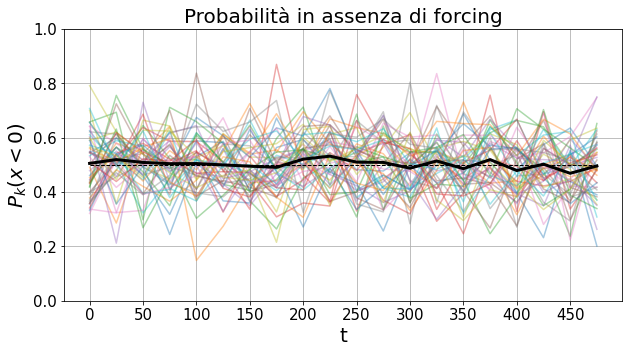

In [168]:
plt.figure(figsize = [10,5])
ax = plt.axes()

# Plot delle singole probabilità P_k

for pr in p:
    plt.plot(pr, alpha = 0.4)

##### 

plt.plot(p.mean(axis = 0), linewidth=3, color = "black")
plt.hlines(0.5, xmin = 0, xmax = 19, linewidth = 1, color = "black", linestyle = "dashed")
ax.set_ylim([0., 1.])
ax.set_xticks(np.arange(0,20,2))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels((5000*dt*np.arange(0,20,2)).astype(int))
ax.set_title("Probabilità in assenza di forcing", fontsize = 20)
ax.set_ylabel("$P_k(x < 0)$", fontsize = 20)
ax.set_xlabel("t", fontsize = 20)
plt.grid()

##### 

plt.savefig("6_noforcing.pdf", bbox_inches = "tight")

In [169]:
### FORCING ###

# Inizializzazione ensemble
x_list = np.zeros([N, len(t)])


for (i, L0) in enumerate(L0_list):
    x_list[i,:], _, _ = forward_euler(set_A, L0, num_steps = num_steps, flag = 1)
    
# Inizializzazione array probabilità
M = int((num_steps)/5000)
p = np.zeros([N, M])

for i in range(M):
    x = x_list[:, (i*5000 + 1):(i*5000 + 5001)]
    for j in range(N):
        p[j, i] = len(x[j, :][x[j, :] < 0])/len(x[j,:])


C:\Users\feder\AppData\Local\Temp\ipykernel_33508\928653727.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((5000*dt*np.arange(0,20,2)).astype(int))


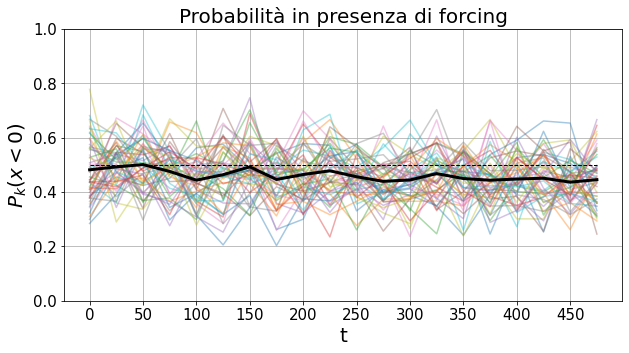

In [170]:
plt.figure(figsize = [10,5])
ax = plt.axes()

# Plot delle singole probabilità P_k
for pr in p:
    plt.plot(pr, alpha = 0.4)
    
#####

plt.plot(p.mean(axis = 0), linewidth=3, color = "black")
plt.hlines(0.5, xmin = 0, xmax = 19, linewidth = 1, color = "black", linestyle = "dashed")
ax.set_xticklabels((5000*dt*np.arange(0,20,2)).astype(int))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(np.arange(0,20,2))
ax.set_ylabel("$P_k(x < 0)$", fontsize = 20)
ax.set_xlabel("t", fontsize = 20)
ax.set_title("Probabilità in presenza di forcing", fontsize = 20)
ax.set_ylim([0., 1.])
plt.grid()

#####

plt.savefig("6_forcing.pdf", bbox_inches = "tight")